In [9]:
#read csv file and checking data 
import pandas as pd
housing=pd.read_csv("data.csv")
# housing.head()
# housing.info()
# housing['CHAS']
# housing['CHAS'].value_counts()
# housing.describe()


In [11]:
#create ploting
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))
# plt.show()

In [13]:
#Train-Test Spliting for user define function
# import numpy as np
# def split_train_test(data, text_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size=int(len(data) * text_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]
# train_set, test_set=split_train_test(housing, 0.2)

# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [15]:
#Train-Test Spliting for sklearn function
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    start_train_set=housing.loc[train_index]
    start_test_set=housing.loc[test_index]
print(start_train_set["CHAS"].value_counts())
print(start_test_set["CHAS"].value_counts())

0    376
1     28
Name: CHAS, dtype: int64
0    95
1     7
Name: CHAS, dtype: int64


In [19]:
housing=start_train_set.copy()

In [21]:
# Looking for Correlations
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680321
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INOUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.526151
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

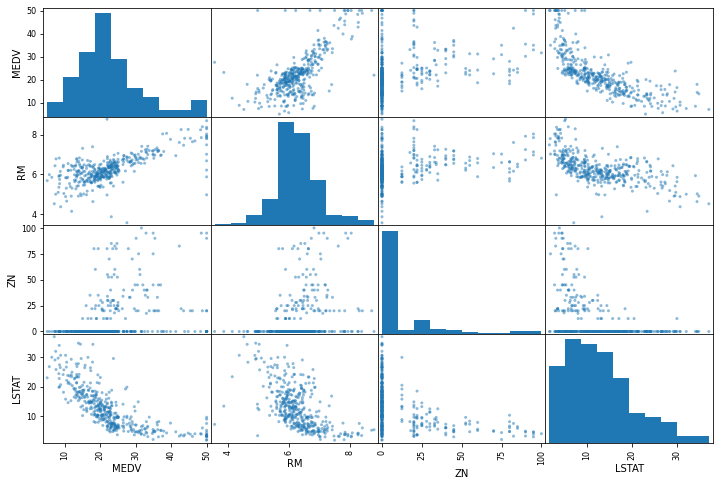

In [23]:
# Looking for Correlations plot
from pandas.plotting import scatter_matrix
attributes=["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

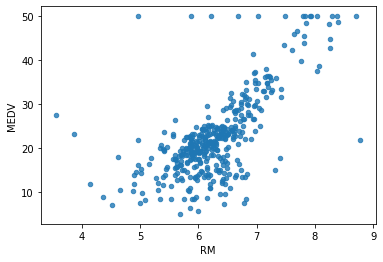

In [25]:
# Looking for Correlations big size plot
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

In [27]:
# Trying out Attribute combinations
housing["TAXRM"]=housing["TAX"]/housing["RM"]
housing.head()


,CRIM,ZN,INOUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [29]:
# Trying out Attribute combinations Correlations
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680321
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INOUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.526151
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

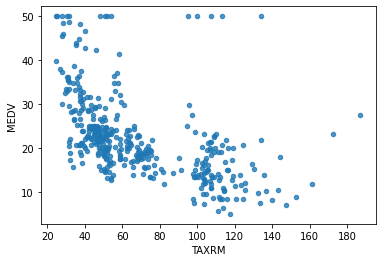

In [31]:
#Attribute combinations Correlations plot
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [33]:
# seprate feature and labels
housing=start_train_set.drop("MEDV", axis=1)
housing_labels=start_train_set["MEDV"].copy()

In [35]:
# Missing Attributes
# 1. Get rid of the missing data points (delete empty row)
# 2. Get rid of the whole Attributes(delete empty column)
# 3. Set the value to same value(0, mean or median)

# 1 option
# housing.dropna(subset=["RM"])
housing.dropna(subset=["RM"]).shape
# Note that the oringianl datafram will remain unchanged


(401, 14)

In [37]:
# 2 option
# housing.drop("RM", axis=1)
housing.drop("RM", axis=1).shape
# Note that there is no RM column and alos Note that the oringianl datafram will remain unchanged

(404, 13)

In [39]:
# 3 option
median=housing["RM"].median()
print(median)
housing["RM"].fillna(median)
housing.shape
# Note that the oringianl datafram will remain unchanged

6.211


(404, 14)

In [41]:
# Before we started filling missing attributes
housing.describe()


,CRIM,ZN,INOUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281606,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,67.538249
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715294,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,31.564294
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,44.783385
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,53.867403
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,98.666667
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,187.026116


In [ ]:
# Function for median value for all columns
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

imputer.statistics_

In [44]:
# Fill missing value in housing_tr dataframe
x=imputer.transform(housing)
housing_tr=pd.DataFrame(x, columns=housing.columns)
housing_tr.describe()


,CRIM,ZN,INOUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281082,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,67.436733
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712652,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,31.468538
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,44.801475
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,53.867403
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,187.026116


In [46]:
# Scikit-learn Design
# Primarily, three types of objects
# 1. Estimators - It estimates some parameter based on a dataset. Eg. imputer 
# It has a fit method and transofrm method.
# Fit method - Fits the dataset and caluclates internal parameter.

# 2. Transformers - Transorm method takes input and and returns output based on the learnings from fit(). It also has a convenience fuction called fit_transform() which fits and then transforms.

# 3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common fucntions. It also given score() fuction which will evaluate the predictors. 



In [48]:
# Feature Scaling
# Primarily, two types of feature scaling methods:
# 1. Min-max scaling (Normalization)
# (value-min)/(max-min)
# Sklearn provides a class called MinMaxScaler for this

# 2. Standardixation
# (value-mean)/std
# Sklearn provides a class called StandardScaler for this


In [50]:
# Creating a Pipelien
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
# add as many as you want in your pipeline
])

 

In [52]:
# housing_num_tr=my_pipeline.fit_transform(housing_tr)
# print(housing_num_tr)

housing_num_tr=my_pipeline.fit_transform(housing_tr)
housing_num_tr.shape

(404, 14)

In [54]:
# Selection a desired model for Housing Price
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)
 

RandomForestRegressor()

In [56]:
# checking values
some_data= housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.236, 25.227, 16.504, 23.455, 23.558])

In [58]:
# checking some values given for model 
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [ ]:
# Evaluating the model
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)
rmse

In [61]:
# Using better evaluation technique - Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error")
rmse_scores=np.sqrt(-scores)
rmse_scores

array([2.91666304, 3.56915598, 3.04404529, 4.21019208, 3.09583372])

In [62]:
# Print output
def prt_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard division: ", scores.std())
prt_scores(rmse_scores)

Scores:  [2.91666304 3.56915598 3.04404529 4.21019208 3.09583372]
Mean:  3.3671780242026843
Standard division:  0.47591470734367947


In [63]:
# Saving model
from joblib import dump, load
dump(model, 'HousingPrice.joblib')

['HousingPrice.joblib']

In [64]:
# Testing the model on test data
x_test=start_test_set.drop("MEDV", axis=1)
y_test=start_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test, final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions, list(y_test))
final_rmse


ValueError: Number of features of the model must match the input. Model n_features is 15 and input n_features is 14 

In [65]:
# Check one row values
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24317098, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034, -0.50478021])

In [66]:
# Using the model
from joblib import dump, load
model=load('HousingPrice.joblib')
features=np.array([[-0.43942006,  1.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24317098, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

ValueError: Number of features of the model must match the input. Model n_features is 15 and input n_features is 13 